In [ ]:
# Compare average monthly time series of CESM to CMIP6 model data
# Here  data have already had the monthly time series extracted from netcdfs and saved as a timeseries in a .txt file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import re
from datetime import datetime

In [2]:
# specify the directories that the two datasets to be compared are saved in.
dir= '/Volumes/MCO_SSD/data/subbasin_data/CMIP6/**/mrro/grouped_subbasins/east_west/*.txt'
dir2 = '/Volumes/MCO_SSD/data/subbasin_data/ERA5/runoff/CESM_grid/grouped_subbasins/east_west/*.txt'
dir3 = '/Volumes/MCO_SSD/data/subbasin_data/CESM/QRUNOFF/grouped_subbasins/east_west/*.txt'

dir4 = '/Volumes/MCO_SSD/data/subbasin_data/CMIP6/**/mrro/grouped_subbasins/entirebasin/*.txt'
dir5 = '/Volumes/MCO_SSD/data/subbasin_data/ERA5/runoff/CESM_grid/grouped_subbasins/entirebasin/*.txt'
dir6 = '/Volumes/MCO_SSD/data/subbasin_data/CESM/QRUNOFF/grouped_subbasins/entirebasin/*.txt'

In [3]:
# get list of all files for the two categories of datasets. save each of these as a list to be used in the loop
dir_list = glob(dir, recursive=True)
dir_list2 = glob(dir2, recursive=True)
dir_list3 = glob(dir3, recursive=True)
dir_list4 = glob(dir4, recursive=True)
dir_list5 = glob(dir5, recursive=True)
dir_list6 = glob(dir6, recursive=True)

In [4]:
#Basins

#subbasin_list= ['Arkansas.White.Red.Region','Lower.Mississippi.Region', 'Missouri.Region','Ohio.Region','Tennessee.Region','Upper.Mississippi.Region']
#subbasin_list= ['Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region']
subbasin_list= ['Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region', 'Entire.Mississippi.Region']
#subbasin_list= ['Entire.Mississippi.Region']



In [5]:
# Check files

final_filtered_dir_list = []
print(final_filtered_dir_list)
for basin in subbasin_list:
    print(basin)
    filtered_dir_list = [x for x in dir_list if basin in x] 
    #print(filtered_dir_list)
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    #print(filtered_dir_list_2)
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    #print(filtered_dir_list_3)
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6

    final_filtered_dir_list = final_filtered_dir_list
    print(final_filtered_dir_list)

[]
Eastern.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CMIP6/BCC_CSM2_MR/mrro/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_BCC_CSM2_MR_mrro.txt', '/Volumes/MCO_SSD/data/subbasin_data/CMIP6/CanESM5/mrro/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CanESM5_mrro.txt', '/Volumes/MCO_SSD/data/subbasin_data/CMIP6/CESM2_FV2/mrro/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM2_FV2_mrro.txt', '/Volumes/MCO_SSD/data/subbasin_data/CMIP6/MIROC6/mrro/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_MIROC6_mrro.txt', '/Volumes/MCO_SSD/data/subbasin_data/CMIP6/MPI_ESM1_2_LR/mrro/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_MPI_ESM1_2_LR_mrro.txt', '/Volumes/MCO_SSD/data/subbasin_data/CMIP6/MRI_ESM2_0/mrro/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_MRI_ESM2_0_mrro

Eastern.Mississippi.Basin.Region
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_BCC_CSM2_MR_mrro.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CanESM5_mrro.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM2_FV2_mrro.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_MIROC6_mrro.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_MPI_ESM1_2_LR_mrro.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_MRI_ESM2_0_mrro.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_QRUNOFF.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_ERA5_ro.txt


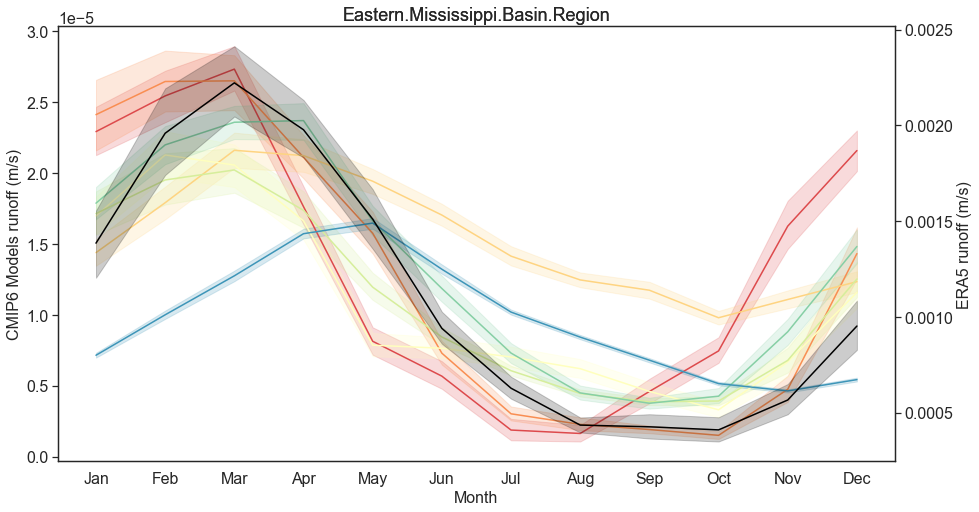

Western.Mississippi.Basin.Region
subbasin_monthly_avg_Western.Mississippi.Basin.Region_BCC_CSM2_MR_mrro.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_CanESM5_mrro.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM2_FV2_mrro.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_MIROC6_mrro.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_MPI_ESM1_2_LR_mrro.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_MRI_ESM2_0_mrro.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_QRUNOFF.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_ERA5_ro.txt


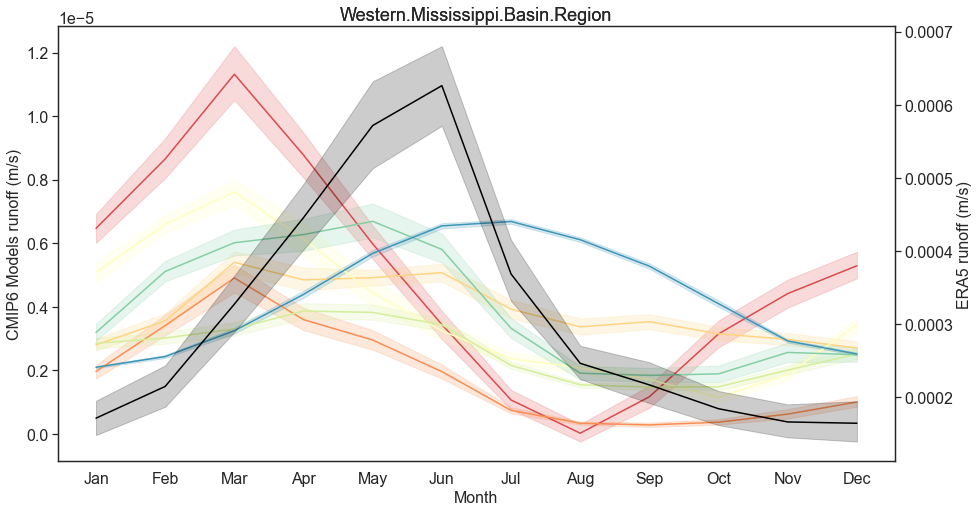

Entire.Mississippi.Region
subbasin_monthly_avg_Entire.Mississippi.Region_BCC_CSM2_MR_mrro.txt
subbasin_monthly_avg_Entire.Mississippi.Region_CanESM5_mrro.txt
subbasin_monthly_avg_Entire.Mississippi.Region_CESM2_FV2_mrro.txt
subbasin_monthly_avg_Entire.Mississippi.Region_MIROC6_FV2_mrro.txt
subbasin_monthly_avg_Entire.Mississippi.Region_MPI_ESM1_2_LR_FV2_mrro.txt
subbasin_monthly_avg_Entire.Mississippi.Region_MRI_ESM2_0_mrro.txt
subbasin_monthly_avg_Entire.Mississippi.Region_ERA5_ro.txt
subbasin_monthly_avg_Entire.Mississippi.Region_CESM_QRUNOFF.txt


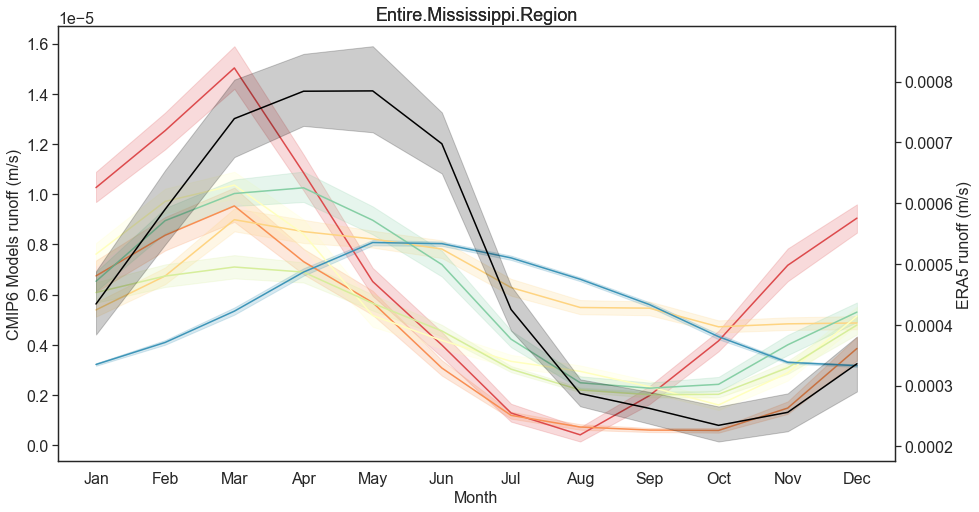

In [7]:
#Setup dfs, plots average monthly time series of all with confidence intervals. Plot by basin.

for basin in subbasin_list:
    print(basin)
    filtered_dir_list = [x for x in dir_list if basin in x] 
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6

    final_filtered_dir_list = final_filtered_dir_list
    #print(final_filtered_dir_list)

    #create dataframe to store the mean values for each subbasin, for plotting
    df_plot_values = pd.DataFrame()
    df_plot_means = pd.DataFrame()

    for directory in final_filtered_dir_list:
        name = os.path.basename(directory)
        print(name)
    
        # setup dataframe
        df = pd.read_csv(directory, sep=" ", header = 0)
        df['DATE'] = pd.to_datetime(df['DATE'])
        df = df.set_index('DATE')
        df.insert(2,'dataset_name',name)
        df_means = df.groupby('month').agg('value').mean()
        df_means = df_means.reset_index()
        df_means.insert(2,'dataset_name',name)
        
        # append the dataset of monthly means to the master df for plotting
        df_plot_values = df_plot_values.append(df, ignore_index = True)
        df_plot_means = df_plot_means.append(df_means, ignore_index = True)
    

    left_axis = df_plot_values[~df_plot_values['dataset_name'].str.contains("ERA5")]
    left_axis_means = df_plot_means[~df_plot_means['dataset_name'].str.contains("ERA5")]
    right_axis = df_plot_values[df_plot_values['dataset_name'].str.contains("ERA5")]
    right_axis_means = df_plot_means[df_plot_means['dataset_name'].str.contains("ERA5")]
        
    #print(left_axis)
    #print(right_axis)
        
    # Plot yearly with line for means
    sns.set(style='white', rc={'axes.labelsize': 16, 'axes.titlesize': 18, 'font.size': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16})

    plt.figure(figsize=(15,8))
    ax1 = plt.subplot()
    ax2 = ax1.twinx()
    sns.lineplot(data=left_axis, x="month", y="value", hue = "dataset_name", palette = "Spectral", alpha = 0.05, ax=ax1) #.sns.color_palette("Blues") #, hue="dataset_name"
    sns.lineplot(data=left_axis_means, x="month", y="value", hue="dataset_name", palette = "Spectral", ax=ax1).set(title= basin)
    sns.lineplot(data=right_axis, x="month", y="value", color = "black", alpha = 0.05,  ax=ax2) #.sns.color_palette("Blues") #, hue="dataset_name"
    sns.lineplot(data=right_axis_means, x="month", y="value", color = "black", ax=ax2).set(title= basin)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    ax1.set_ylabel("CMIP6 Models runoff (m/s)", size=16)
    ax2.set_ylabel("ERA5 runoff (m/s)", size=16)
    ax1.set_xlabel("Month", size=16)
    ax1.get_legend().remove()
    ax2.get_legend()#.remove()
    
    #plt.savefig(f'/Volumes/MCO_SSD/data/plots/validation_paper/CMIP6_runoff_{basin}.png', dpi=300, bbox_inches='tight')
    plt.show()
    